## Welcome to AI Camp's Data Science curriculum!

> This notebook will cover everything you need to know to open, combine, modify, and vosialize your data. It will be broken up into three major sections. The first section will cover loading the datasets and handling any merging issues that may arrise. The second section will cover how to format the data and fill in any null values that you may have. The third section will cover how to visualize the data and use that visualization to pick out the most important data points to use.



# **Section 1**: Loading and merging the data

> In this section we will cover:
*   What imports we will need
*   How to load a CSV file
*   How to merge CSV files
*   How to deal with any merging conflicts you may encounter





We will be covering what imports we need at the top of each section, however there will be two code blocks at the bottom that include all of the imports and all of the functions that we create throughout our data exploration

First and foremost, we will be using pandas to handel all of our data managment needs. We will see it in action soon enough but just know that if we're dealing directly we data, we'll probably be using this. Next, we will be importing numpy. Numpy is what we will be using for a majority of our math related problems, such as dividing a row of data by a number.

In [9]:
import numpy as np
import pandas as pd

Now we'll go ahead and load up our data. For this, make sure that the text inside of the airquotes is a path to the data that you want to load. Once we have it loaded in, we will use the head() function to get a preview of what the data will look like

In [10]:
height_data = pd.read_csv('Height of Male and Female by Country 2022.csv')
country_data = pd.read_csv('countries of the world.csv', decimal=',')

country_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [11]:
height_data.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


In addition to the head() function, we can use the info() function to get a more general overview of the data. Including how many data entries there are, the data type of each column and how many non null values there are.

In [12]:
height_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 199 non-null    int64  
 1   Country Name         199 non-null    object 
 2   Male Height in Cm    199 non-null    float64
 3   Female Height in Cm  199 non-null    float64
 4   Male Height in Ft    199 non-null    float64
 5   Female Height in Ft  199 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [0]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

We want to merge the datasets based on the name of the country, but the datasets have different columns for the name of the country, "Country Name" and "Country". So we rename the height data's column to match the country data's column

In [13]:
height_data = height_data.rename(columns={"Country Name" : "Country"})

Fantastic! Next we merge the two datasets based on the "Country" column and print out the first 5 entries

In [14]:
merged_df = pd.merge(country_data, height_data, on=['Country'])
merged_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Birthrate,Deathrate,Agriculture,Industry,Service,Rank,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft


Uh oh, our merged dataset is empty. An important thing to note about the merge function is that it drops none matching values from the new dataset, or in other words, if it can't find a matching value in both datasets, it drops the whole row.

What this means for our datasets is that theres either a different naming convention between the datasets or theres a problem with how we loaded the data, so we're going to output all of the unique values for the country column in both of the datasets

In [15]:
height_data['Country'].unique()

array(['Netherlands', 'Montenegro', 'Estonia', 'Bosnia and Herzegovina',
       'Iceland', 'Denmark', 'Czech Republic', 'Latvia', 'Slovakia',
       'Slovenia', 'Ukraine', 'Croatia', 'Serbia', 'Lithuania', 'Poland',
       'Finland', 'Norway', 'Sweden', 'Germany', 'Dominica', 'Bermuda',
       'Puerto Rico', 'Greece', 'Belgium', 'Ireland', 'Lebanon',
       'Andorra', 'Antigua and Barbuda', 'Australia', 'Canada',
       'Switzerland', 'Grenada', 'Belarus', 'France', 'Austria',
       'Luxembourg', 'Cook Islands', 'French Polynesia', 'United Kingdom',
       'Romania', 'New Zealand', 'Saint Vincent and the Grenadines',
       'Niue', 'American Samoa', 'Barbados', 'Jamaica', 'United States',
       'Tunisia', 'Russia', 'Hungary', 'Saint Lucia', 'North Macedonia',
       'Libya', 'Turkey', 'Morocco', 'Senegal', 'Spain', 'Tokelau',
       'Trinidad and Tobago', 'Israel', 'Georgia', 'Seychelles', 'Brazil',
       'China', 'Iran', 'Moldova', 'South Korea', 'Kazakhstan', 'Tonga',
       'Pale

In [0]:
country_data['Country'].unique()

array(['Afghanistan ', 'Albania ', 'Algeria ', 'American Samoa ',
       'Andorra ', 'Angola ', 'Anguilla ', 'Antigua & Barbuda ',
       'Argentina ', 'Armenia ', 'Aruba ', 'Australia ', 'Austria ',
       'Azerbaijan ', 'Bahamas, The ', 'Bahrain ', 'Bangladesh ',
       'Barbados ', 'Belarus ', 'Belgium ', 'Belize ', 'Benin ',
       'Bermuda ', 'Bhutan ', 'Bolivia ', 'Bosnia & Herzegovina ',
       'Botswana ', 'Brazil ', 'British Virgin Is. ', 'Brunei ',
       'Bulgaria ', 'Burkina Faso ', 'Burma ', 'Burundi ', 'Cambodia ',
       'Cameroon ', 'Canada ', 'Cape Verde ', 'Cayman Islands ',
       'Central African Rep. ', 'Chad ', 'Chile ', 'China ', 'Colombia ',
       'Comoros ', 'Congo, Dem. Rep. ', 'Congo, Repub. of the ',
       'Cook Islands ', 'Costa Rica ', "Cote d'Ivoire ", 'Croatia ',
       'Cuba ', 'Cyprus ', 'Czech Republic ', 'Denmark ', 'Djibouti ',
       'Dominica ', 'Dominican Republic ', 'East Timor ', 'Ecuador ',
       'Egypt ', 'El Salvador ', 'Equatorial Guinea

You may notice that in the country dataset, there is an extra space after each of the names. This means that none of the names match between the two datasets resulting in our empty merged dataset

So now we need to remove the last character from the name of each of our countries in the countries dataset. This may sound like a daunting task, but pandas has a great way to apply a function to every row of a dataset. We will be using two pieces of information to accomplish our goal. First, in python strings can be treated as lists, and as such, we can use index slicing to get all but the last character of the string. You can read more about index slicing here: https://realpython.com/lessons/indexing-and-slicing/. Our second important piece of information is that we can use a lambda to create a function in 1 line that will apply a line of code to each row of our column. you can read more about lambda functions here: https://www.w3schools.com/python/python_lambda.asp.


The key take aways are that we can apply a function to every row of our dataset with the "apply" function, we can create a function in one line using a lambda, and we can cut off the last character of a string with index slicing

In [16]:
country_data['Country'] = country_data.apply(lambda row : row.astype(str)['Country'][:-1], axis=1)

And we should now see that the country_data data set has country names that match our height_data country names

In [17]:
country_data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua & Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia & Herzegovina', 'Botswana', 'Brazil', 'British Virgin Is.',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Repub. of the',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faroe Islands', 'Fiji', 

But, in an effort to be thorough, we will use the following loops to figure out if there are any country names that are in one data set but not the other. The first block will show the countries that are in the country_data data set but not the height_data data set and the second block will show what countries are in the height_data data set but not the country_data data set

In [18]:
country_names = country_data['Country'].unique()
country_names.sort()
height_names = height_data['Country'].unique()
height_names.sort()
for name in height_names:
  if name not in country_names:
    print(name)

Antigua and Barbuda
Bahamas
Bosnia and Herzegovina
Central African Republic
DR Congo
Eswatini
Gambia
Ivory Coast
Micronesia
Montenegro
Myanmar
Niue
North Korea
North Macedonia
Palestine
Republic of the Congo
Saint Kitts and Nevis
Sao Tome and Principe
South Korea
Timor-Leste
Tokelau
Trinidad and Tobago


In [0]:
for name in country_names:
  if name not in height_names:
    print(name)

Anguilla
Antigua & Barbuda
Aruba
Bahamas, The
Bosnia & Herzegovina
British Virgin Is.
Burma
Cape Verde
Cayman Islands
Central African Rep.
Congo, Dem. Rep.
Congo, Repub. of the
Cote d'Ivoire
East Timor
Faroe Islands
French Guiana
Gambia, The
Gaza Strip
Gibraltar
Guadeloupe
Guam
Guernsey
Isle of Man
Jersey
Korea, North
Korea, South
Liechtenstein
Macau
Macedonia
Martinique
Mayotte
Micronesia, Fed. St.
Monaco
Montserrat
N. Mariana Islands
Netherlands Antilles
New Caledonia
Reunion
Saint Helena
Saint Kitts & Nevis
San Marino
Sao Tome & Principe
St Pierre & Miquelon
Swaziland
Trinidad & Tobago
Turks & Caicos Is
Virgin Islands
Wallis and Futuna
West Bank
Western Sahara


We'll notice that there's quite a few country names that are unique to each data set so it is our job to figure out why that is and do something to fix it

Some of the names are easy, such as 'Antigua & Barbuda' and 'Antigua and Barbuda', its just an issue of use a '&' instead of the word 'and'. For others, the country names are just in a different order. But some of them are more tricky. After some quick googling, I found that the country_data data set is using outdated names for some of the countries so we will have to fix that as well.

In [19]:
old_names = ['Antigua & Barbuda', 'Bahamas, The', 'Bosnia & Herzegovina', 'Central African Rep.', 'Congo, Dem. Rep.', 'Swaziland', 'Gambia, The', 'Cote d\'Ivoire',
             'Micronesia, Fed. St.', 'Burma', 'Korea, North', 'Macedonia', 'Congo, Repub. of the', 'Saint Kitts & Nevis', 'Sao Tome & Principe',
             'Korea, South', 'East Timor', 'Trinidad & Tobago']

new_names = ['Antigua and Barbuda', 'Bahamas', 'Bosnia and Herzegovina', 'Central African Republic', 'DR Congo', 'Eswatini', 'Gambia', 'Ivory Coast', 'Micronesia',
             'Myanmar', 'North Korea', 'North Macedonia', 'Republic of the Congo', 'Saint Kitts and Nevis', 'Sao Tome and Principe', 'South Korea',
             'Timor-Leste', 'Trinidad and Tobago']

for i in range(len(old_names)):
  country_data['Country'].replace({old_names[i]: new_names[i]}, inplace=True)


In [20]:
country_names = country_data['Country'].unique()
country_names.sort()
height_names = height_data['Country'].unique()
height_names.sort()
for name in height_names:
  if name not in country_names:
    print(name)

Montenegro
Niue
Palestine
Tokelau


In [16]:
merged_df = pd.merge(country_data, height_data, on=['Country'])
merged_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Birthrate,Deathrate,Agriculture,Industry,Service,Rank,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,46.60,20.34,0.380,0.240,0.380,157,168.50,156.11,5.53,5.12
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,15.11,5.22,0.232,0.188,0.579,90,174.07,162.23,5.71,5.32
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,17.14,4.61,0.101,0.600,0.298,71,175.04,162.35,5.74,5.33
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,22.46,3.27,NaN,NaN,NaN,44,177.09,167.55,5.81,5.50
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,8.71,6.25,NaN,NaN,NaN,27,178.84,165.53,5.87,5.43


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             0 non-null      object 
 1   Region                              0 non-null      object 
 2   Population                          0 non-null      int64  
 3   Area (sq. mi.)                      0 non-null      int64  
 4   Pop. Density (per sq. mi.)          0 non-null      float64
 5   Coastline (coast/area ratio)        0 non-null      float64
 6   Net migration                       0 non-null      float64
 7   Infant mortality (per 1000 births)  0 non-null      float64
 8   GDP ($ per capita)                  0 non-null      float64
 9   Literacy (%)                        0 non-null      float64
 10  Phones (per 1000)                   0 non-null      float64
 11  Arable (%)                          0 non-null      float64
 1

In [22]:
merged_df['Region'].unique()

array([], dtype=object)

Lets go ahead and turn everything we did into a function that we can take with us into future sections

In [23]:
def merge_data(country_data, height_data):
  height_data = height_data.rename(columns={"Country Name" : "Country"})
  country_data['Country'] = country_data.apply(lambda row : row.astype(str)['Country'][:-1], axis=1)
  old_names = ['Antigua & Barbuda', 'Bahamas, The', 'Bosnia & Herzegovina', 'Central African Rep.', 'Congo, Dem. Rep.', 'Swaziland', 'Gambia, The', 'Cote d\'Ivoire',
             'Micronesia, Fed. St.', 'Burma', 'Korea, North', 'Macedonia', 'Congo, Repub. of the', 'Saint Kitts & Nevis', 'Sao Tome & Principe',
             'Korea, South', 'East Timor', 'Trinidad & Tobago']

  new_names = ['Antigua and Barbuda', 'Bahamas', 'Bosnia and Herzegovina', 'Central African Republic', 'DR Congo', 'Eswatini', 'Gambia', 'Ivory Coast', 'Micronesia',
              'Myanmar', 'North Korea', 'North Macedonia', 'Republic of the Congo', 'Saint Kitts and Nevis', 'Sao Tome and Principe', 'South Korea',
              'Timor-Leste', 'Trinidad and Tobago']

  for i in range(len(old_names)):
    country_data['Country'].replace({old_names[i]: new_names[i]}, inplace=True)
  
  merged_df = pd.merge(country_data, height_data, on=['Country'])
  return merged_df

In [24]:
height_data = pd.read_csv('Height of Male and Female by Country 2022.csv')
country_data = pd.read_csv('countries of the world.csv', decimal=',')
merged_df = merge_data(country_data, height_data)

## **Section 2**: Cleaning the data

> In this section we will cover:
*   What imports we will need
*   How to rename specific variables in specific rows
*   What to do about null values

We wont need any new imports from what we had in the last section

In [25]:
import numpy as np
import pandas as pd

In [26]:
height_data = pd.read_csv('Height of Male and Female by Country 2022.csv')
country_data = pd.read_csv('countries of the world.csv', decimal=',')
merged_data = merge_data(country_data, height_data)

merged_data['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [27]:
merged_data['Region'] = merged_data.apply(lambda row : row.astype(str)['Region'].strip(), axis=1)
merged_data['Region'].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [28]:
def rename_regions(row):
  if row['Region'] == 'ASIA (EX. NEAR EAST)':
    region = 'ASIA'
  elif row['Region'] == 'NEAR EAST':
    region = 'MIDDLE EAST'
  elif row['Region'] == 'C.W. OF IND. STATES':
    region = "C.W.I. STATES"
  else:
    region = row['Region']
  return region

In [29]:
merged_data['Region'] = merged_data.apply(lambda row : rename_regions(row), axis=1)
merged_data['Region'].unique()

array(['ASIA', 'EASTERN EUROPE', 'NORTHERN AFRICA', 'OCEANIA',
       'WESTERN EUROPE', 'SUB-SAHARAN AFRICA', 'LATIN AMER. & CARIB',
       'C.W.I. STATES', 'MIDDLE EAST', 'NORTHERN AMERICA', 'BALTICS'],
      dtype=object)

We see theres a few null objects in our dataset, namely the climate

In [30]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             195 non-null    object 
 1   Region                              195 non-null    object 
 2   Population                          195 non-null    int64  
 3   Area (sq. mi.)                      195 non-null    int64  
 4   Pop. Density (per sq. mi.)          195 non-null    float64
 5   Coastline (coast/area ratio)        195 non-null    float64
 6   Net migration                       194 non-null    float64
 7   Infant mortality (per 1000 births)  194 non-null    float64
 8   GDP ($ per capita)                  195 non-null    float64
 9   Literacy (%)                        187 non-null    float64
 10  Phones (per 1000)                   193 non-null    float64
 11  Arable (%)                          195 non-n

In order to fill in the missing data. I chose to take the median value of the countries in the region and use them in place of the missing data. The climate is a special case because it is categorical, meaning that it should be a whole number that corresponds to a particular climate.

In [31]:
for col in merged_data.columns.values:
    # if there aren't any null values in this col, skip it
    if merged_data[col].isnull().sum() == 0:
        continue
    # if the col is climate, get the mode, or most common value, and use it as the guessed values
    if col == 'Climate':
        guess_values = merged_data.groupby('Region')['Climate'].apply(lambda x: x.mode())
    else:
    # in all other cases, get the median, or average, of the column grouped by the region
        guess_values = merged_data.groupby('Region')[col].median()
    # for each region in the data set, go through and find all of the null values and set them to the median for that region
    for region in merged_data['Region'].unique():
        merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]

<ipython-input-31-012b71fee181>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]
<ipython-input-31-012b71fee181>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]
<ipython-input-31-012b71fee181>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

<ipython-input-31-012b71fee181>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]
<ipython-input-31-012b71fee181>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]
<ipython-input-31-012b71fee181>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

<ipython-input-31-012b71fee181>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]
<ipython-input-31-012b71fee181>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]
<ipython-input-31-012b71fee181>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [30]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             195 non-null    object 
 1   Region                              195 non-null    object 
 2   Population                          195 non-null    int64  
 3   Area (sq. mi.)                      195 non-null    int64  
 4   Pop. Density (per sq. mi.)          195 non-null    float64
 5   Coastline (coast/area ratio)        195 non-null    float64
 6   Net migration                       195 non-null    float64
 7   Infant mortality (per 1000 births)  195 non-null    float64
 8   GDP ($ per capita)                  195 non-null    float64
 9   Literacy (%)                        195 non-null    float64
 10  Phones (per 1000)                   195 non-null    float64
 11  Arable (%)                          195 non-n

Now lets combine everything into a single function like we did in the previous notebook so that we can bring it with us to the next one

In [32]:
def rename_regions(row):
  if row['Region'] == 'ASIA (EX. NEAR EAST)':
    region = 'ASIA'
  elif row['Region'] == 'NEAR EAST':
    region = 'MIDDLE EAST'
  elif row['Region'] == 'C.W. OF IND. STATES':
    region = "C.W.I. STATES"
  else:
    region = row['Region']
  return region

def format_and_clean_data(merged_data):

  merged_data['Region'] = merged_data.apply(lambda row : row.astype(str)['Region'].strip(), axis=1)
  merged_data['Region'] = merged_data.apply(lambda row : rename_regions(row), axis=1)

  for col in merged_data.columns.values:
    # if there aren't any null values in this col, skip it
    if merged_data[col].isnull().sum() == 0:
        continue
    # if the col is climate, get the mode, or most common value, and use it as the guessed values
    if col == 'Climate':
        guess_values = merged_data.groupby('Region')['Climate'].apply(lambda x: x.mode())
    else:
    # in all other cases, get the median, or average, of the column grouped by the region
        guess_values = merged_data.groupby('Region')[col].median()
    # for each region in the data set, go through and find all of the null values and set them to the median for that region
    for region in merged_data['Region'].unique():
        merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]

  return merged_data

# **Section 3**: Visualizing the data and PCA

> In this section we will cover:
*   What imports we will need
*   how to vizualize the data
*   How to pick out the data that you want
*   How to combine columns together to reduce the complexity of the data

Before you start this setion, create a list of a few different questions that you could answer with the data that we have collected. For example, with the dataset that I've been using, I want to know the best way to figure out if a nation is wealthy or not and I want to know how different factors influce a person's height.

For this section we will be adding seaborn and pyplot to our list of modules. We will be using seaborn to create a correlation map, or a vizualization of how each column is related to each other column, and for showing a scatter plot of two columns. If you don't understand what either of those things are, thats okay, it will make more sense when you see it in action. We will be using pyplot to show the charts and maps that we make with seaborn.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

We will start with a clean data set to avoid any previous sections impacting this one

In [34]:
height_data = pd.read_csv('Height of Male and Female by Country 2022.csv')
country_data = pd.read_csv('countries of the world.csv', decimal=',')

merged_data = merge_data(country_data, height_data)
merged_data = format_and_clean_data(merged_data)
merged_data.head()

<ipython-input-32-a8752ee3f009>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]
<ipython-input-32-a8752ee3f009>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]
<ipython-input-32-a8752ee3f009>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

<ipython-input-32-a8752ee3f009>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]
<ipython-input-32-a8752ee3f009>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]


<ipython-input-32-a8752ee3f009>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]
<ipython-input-32-a8752ee3f009>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]
<ipython-input-32-a8752ee3f009>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

<ipython-input-32-a8752ee3f009>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]
<ipython-input-32-a8752ee3f009>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Birthrate,Deathrate,Agriculture,Industry,Service,Rank,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,Afghanistan,ASIA,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,46.60,20.34,0.380,0.240,0.380,157,168.50,156.11,5.53,5.12
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,15.11,5.22,0.232,0.188,0.579,90,174.07,162.23,5.71,5.32
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,17.14,4.61,0.101,0.600,0.298,71,175.04,162.35,5.74,5.33
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,22.46,3.27,0.151,0.190,0.620,44,177.09,167.55,5.81,5.50
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,8.71,6.25,0.021,0.274,0.707,27,178.84,165.53,5.87,5.43


Now that our data is ready to go again, its time to analyze it and pick out the most important parts. For most machine learning models, it is very important to reduce the number of unique datapoints we give to it. 

To understand why we do this, first image that you are acting as the model. Lets say your job is to determine if you should bring an umbrella with you on any given day. Would you rather be given the air pressure, average temerature, wind speed, wind direction, humidity and time of year or would you rather be given the % chance that it will rain? Obviously you'd rather just have the % chance of rain because it gives you all the information you need to know in the least amount of space making it easy for you to make a decision.

We want to do the same thing for our models to help them make the best decisions possible. In general, data that is highly correlated can be reduced to a single piece of data. Below are all of the pieces of data that we are keeping track of and a correlation heatmap that we can use the help us decide what should be combined.

In [35]:
merged_data.columns.values

array(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Rank',
       'Male Height in Cm', 'Female Height in Cm', 'Male Height in Ft',
       'Female Height in Ft'], dtype=object)

When reading the heatmap, you should know that positive numbers indicate that the two datapoints are strongly positvely correlated meaning that as one datapoint increases, the other usually increases. Negative numbers indicate that the two datapoints are strongly negatively correlated meaning that as one datapoint increases, the other usually decreases. Finally, numbers close to zero indicate that there is little to no correlation between the two datapoints meaning that as one increases, the other is just as likely to increase as it is to decrease.

Lets take a moment to look over the heatmap and keep track of which columns can be combined and come up with a reason for why we think that.

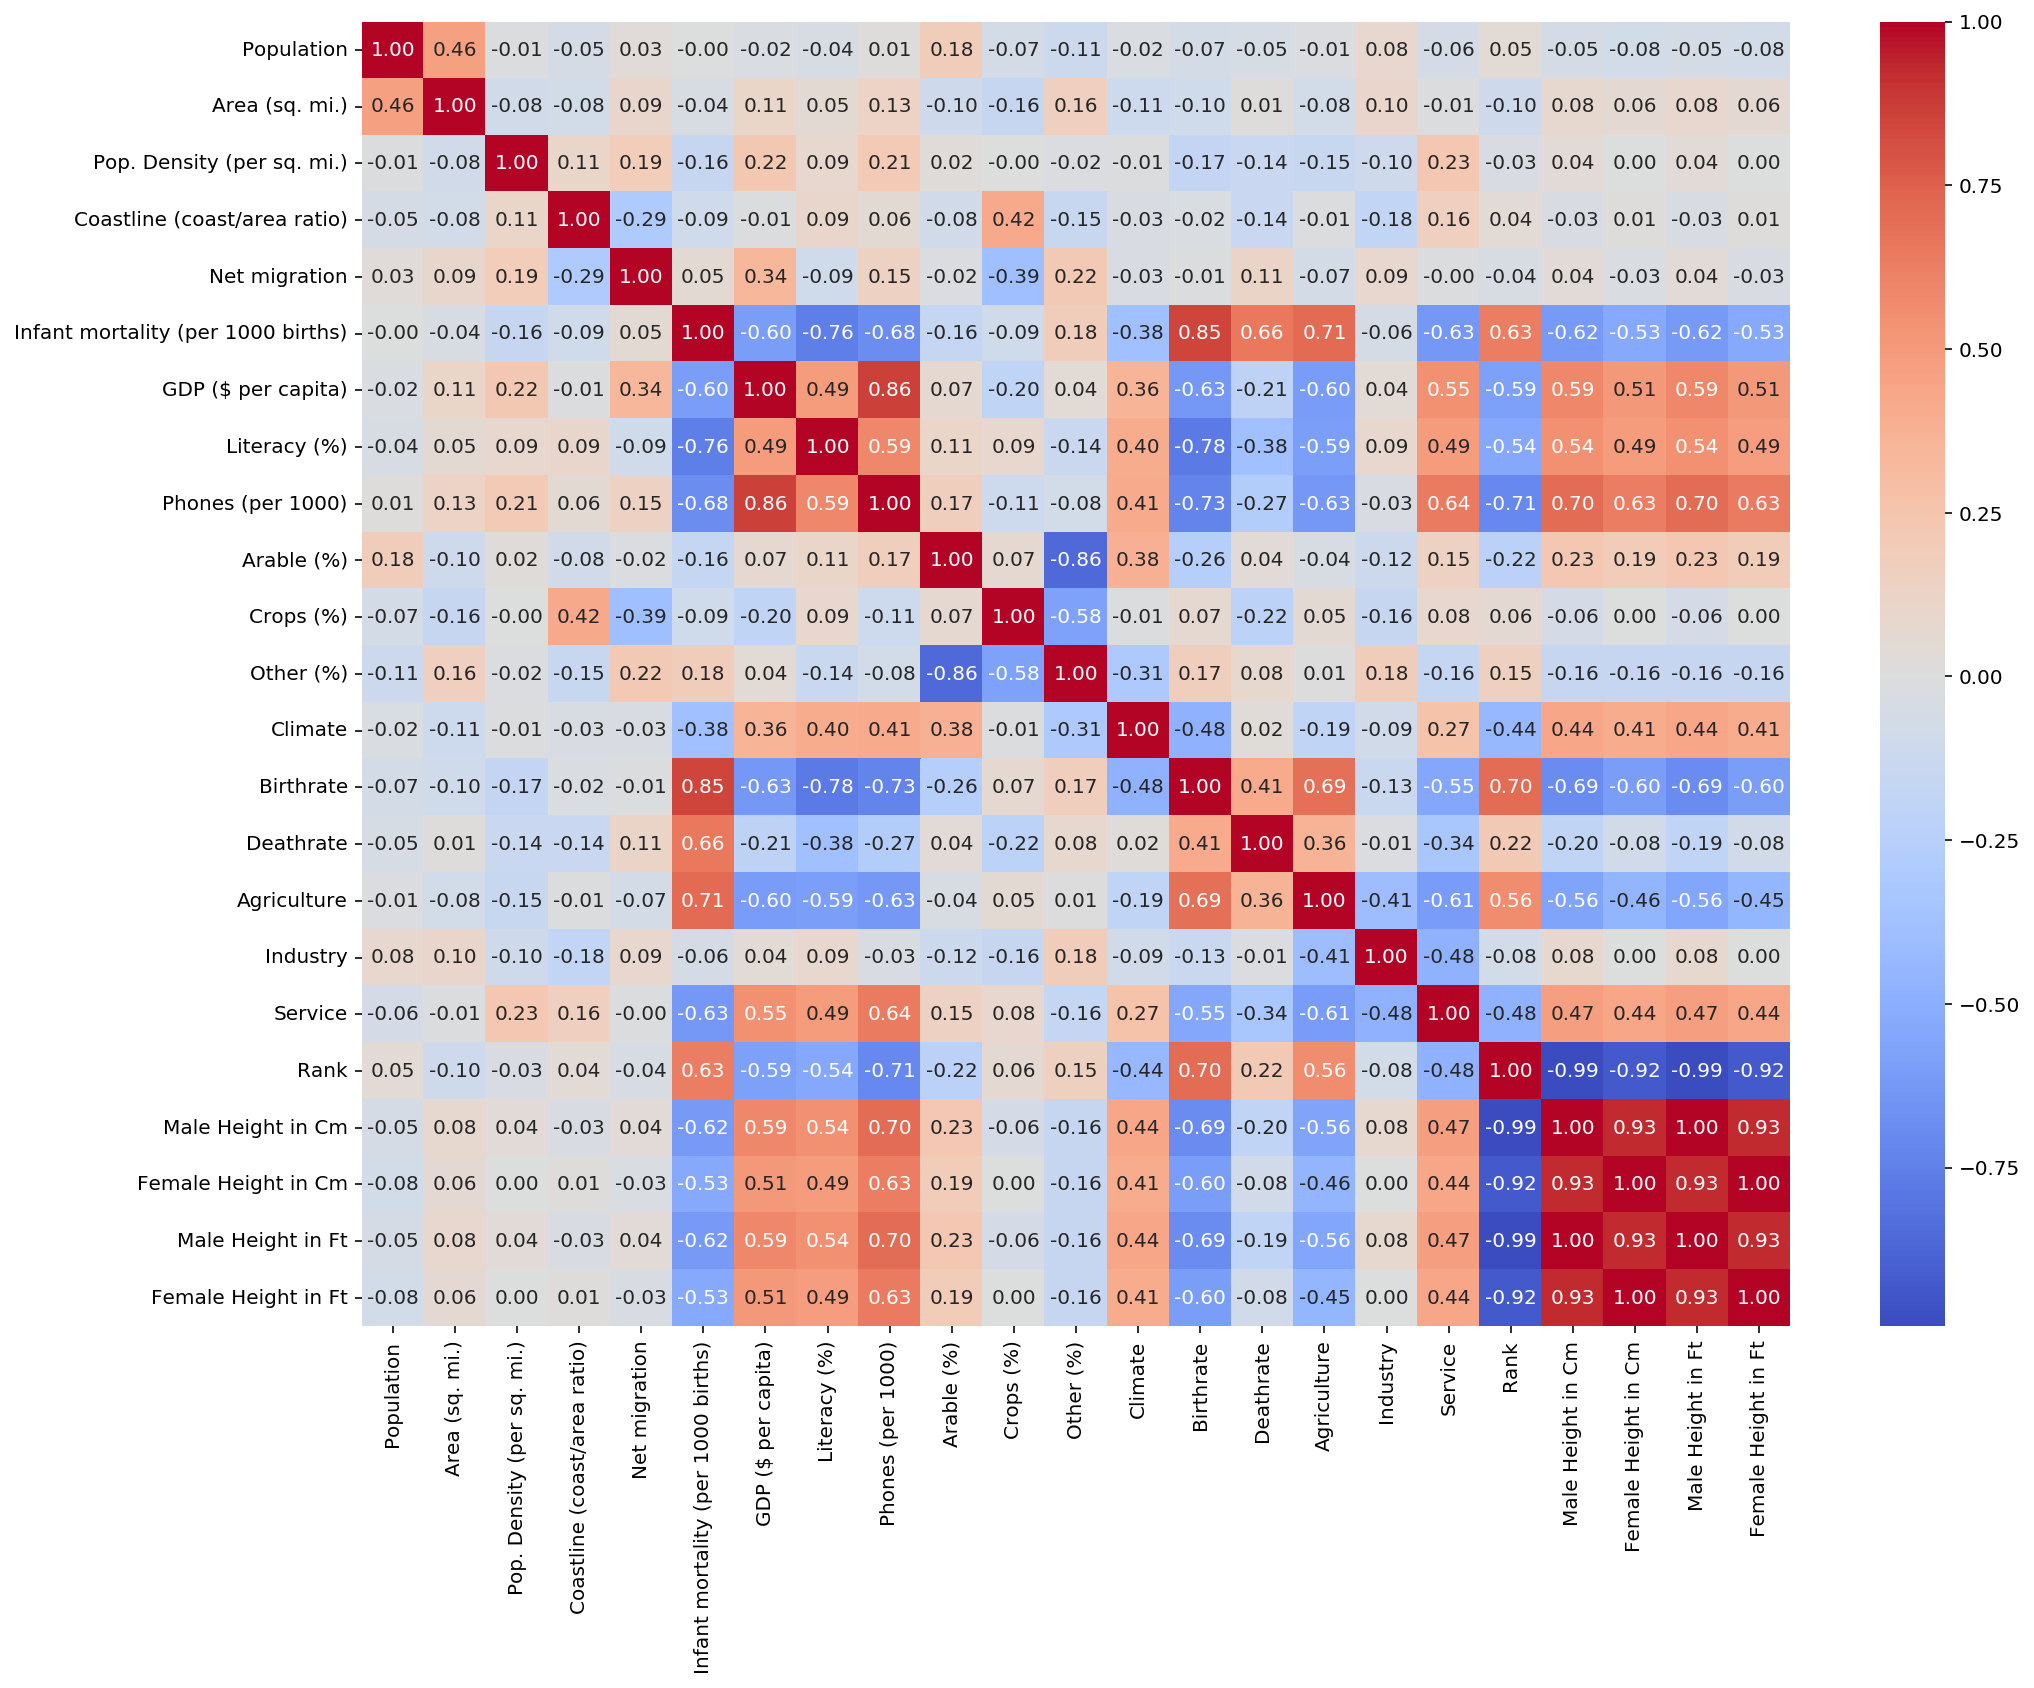

In [36]:
plt.figure(figsize=(16,12))
sns.heatmap(data=merged_data.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

The first and most obvious datapoints that can be combined are Male Height in Cm, Female Height in Cm, Male Height in Ft, and Female Height in Ft because they are highly correlated and we can come up with a clear reason as to why they are correlated. I'll go ahead and drop the Cm measurement and then average the height of males and females into a single value.

In [41]:
merged_data = merged_data.drop(['Male Height in Cm', 'Female Height in Cm'], axis=1)
merged_data['Average Height in Ft'] = merged_data['Female Height in Ft'] / 2 + merged_data['Male Height in Ft'] / 2
merged_data = merged_data.drop(['Male Height in Ft', 'Female Height in Ft'], axis=1)

merged_data.head()

KeyError: "['Male Height in Cm', 'Female Height in Cm'] not found in axis"

Now that the data is a bit simpler, we will start to pick out which features we want to use to answer our questions. Lets look at the correlation heatmap again and decide which features we should use to calculate how wealthy a country is and which features to use to calculate the average height of a country.

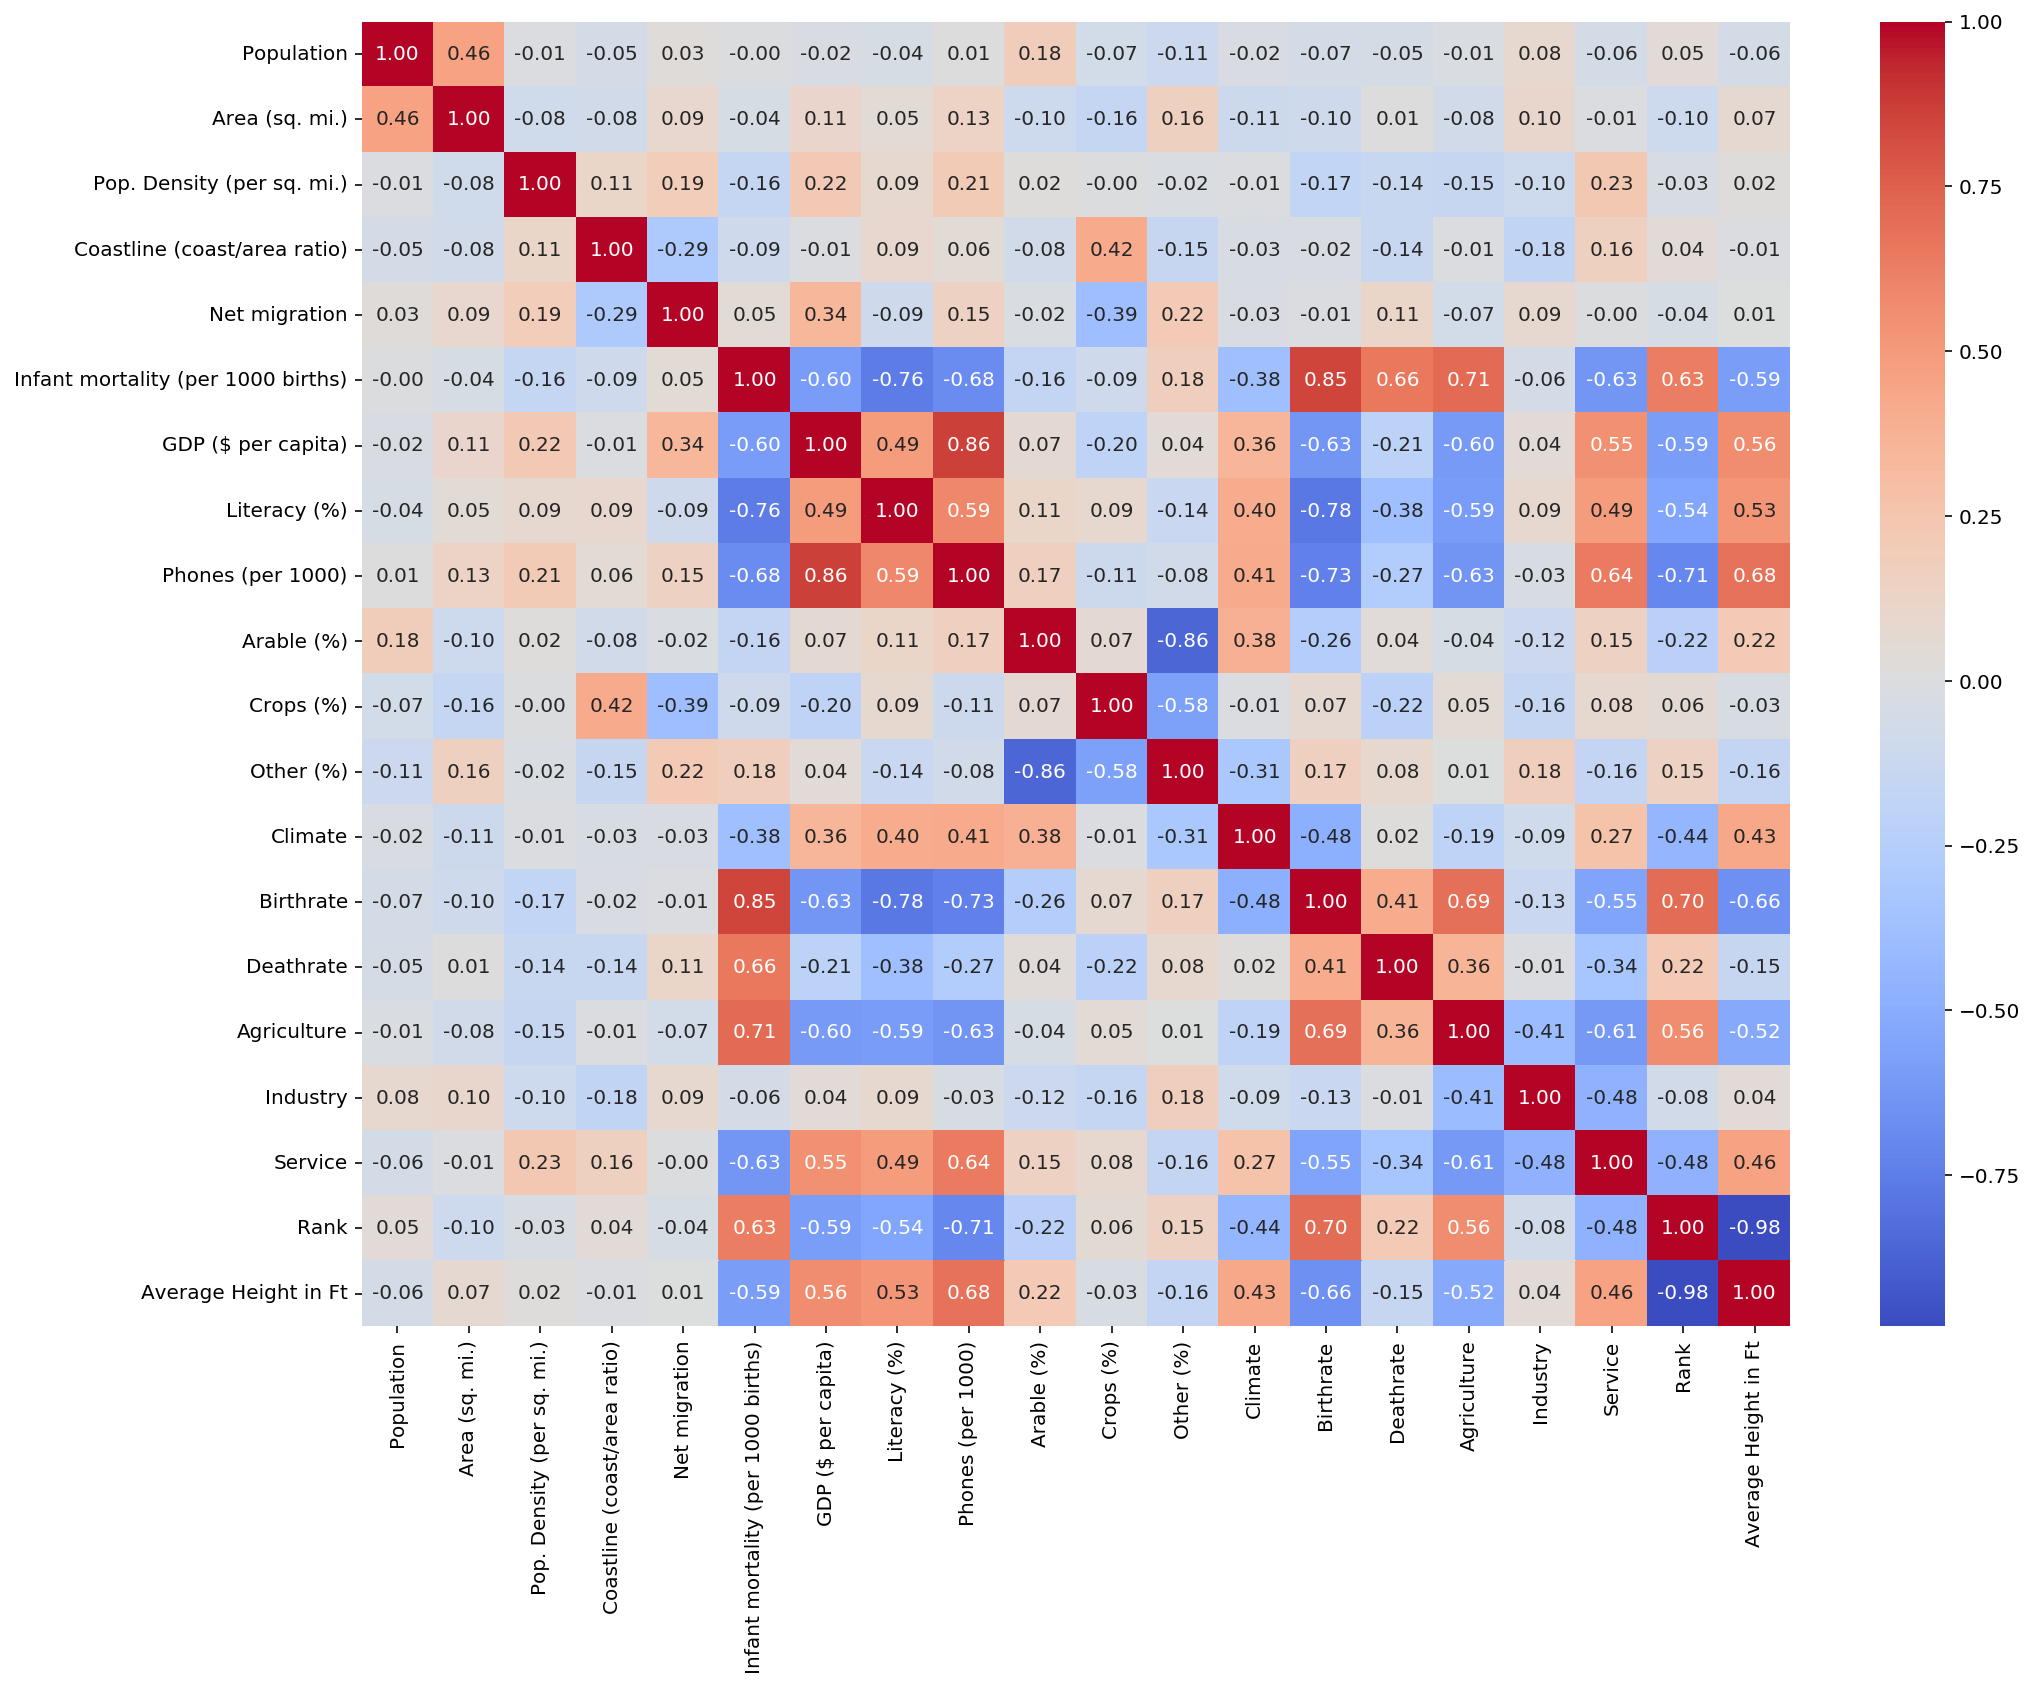

In [42]:
plt.figure(figsize=(16,12))
sns.heatmap(data=merged_data.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

For my data, I simply chose the data points that had a noticable correlation with the data I was interested in. This will certainly lead to problems in the different models due to them only looking at correlation and not causation. For example, average height is correlated with number of phones so our model could reasonably assume that the more phones a person buys, the tallers they will get. This obviously doesn't make sense to us but in more complicated problems it can be easy to include unnecessary data. For examples of this happening in the real world, look at https://www.tylervigen.com/spurious-correlations

For now, I'll leave in all of the correlated data points so that we can see how this affects different models down the line. I'll put all of the data that I want to use for my model into its own dataset so that it will be easier to keep track of

In [39]:
GDP_features = ['GDP ($ per capita)', 'Infant mortality (per 1000 births)', 'Net migration', 'Pop. Density (per sq. mi.)',
                'Literacy (%)', 'Phones (per 1000)', 'Birthrate', 'Agriculture', 'Industry', 'Service']
gdp_data = merged_data[GDP_features]
height_features = ['Average Height in Ft', 'Agriculture', 'Service', 'Phones (per 1000)', 'GDP ($ per capita)', 'Literacy (%)']
avg_height_data = merged_data[height_features]

Now we should see that the data we chose is correlated with the data we are trying to guess, meaning that the data we chose is a good predictor for the data we are trying to guess.

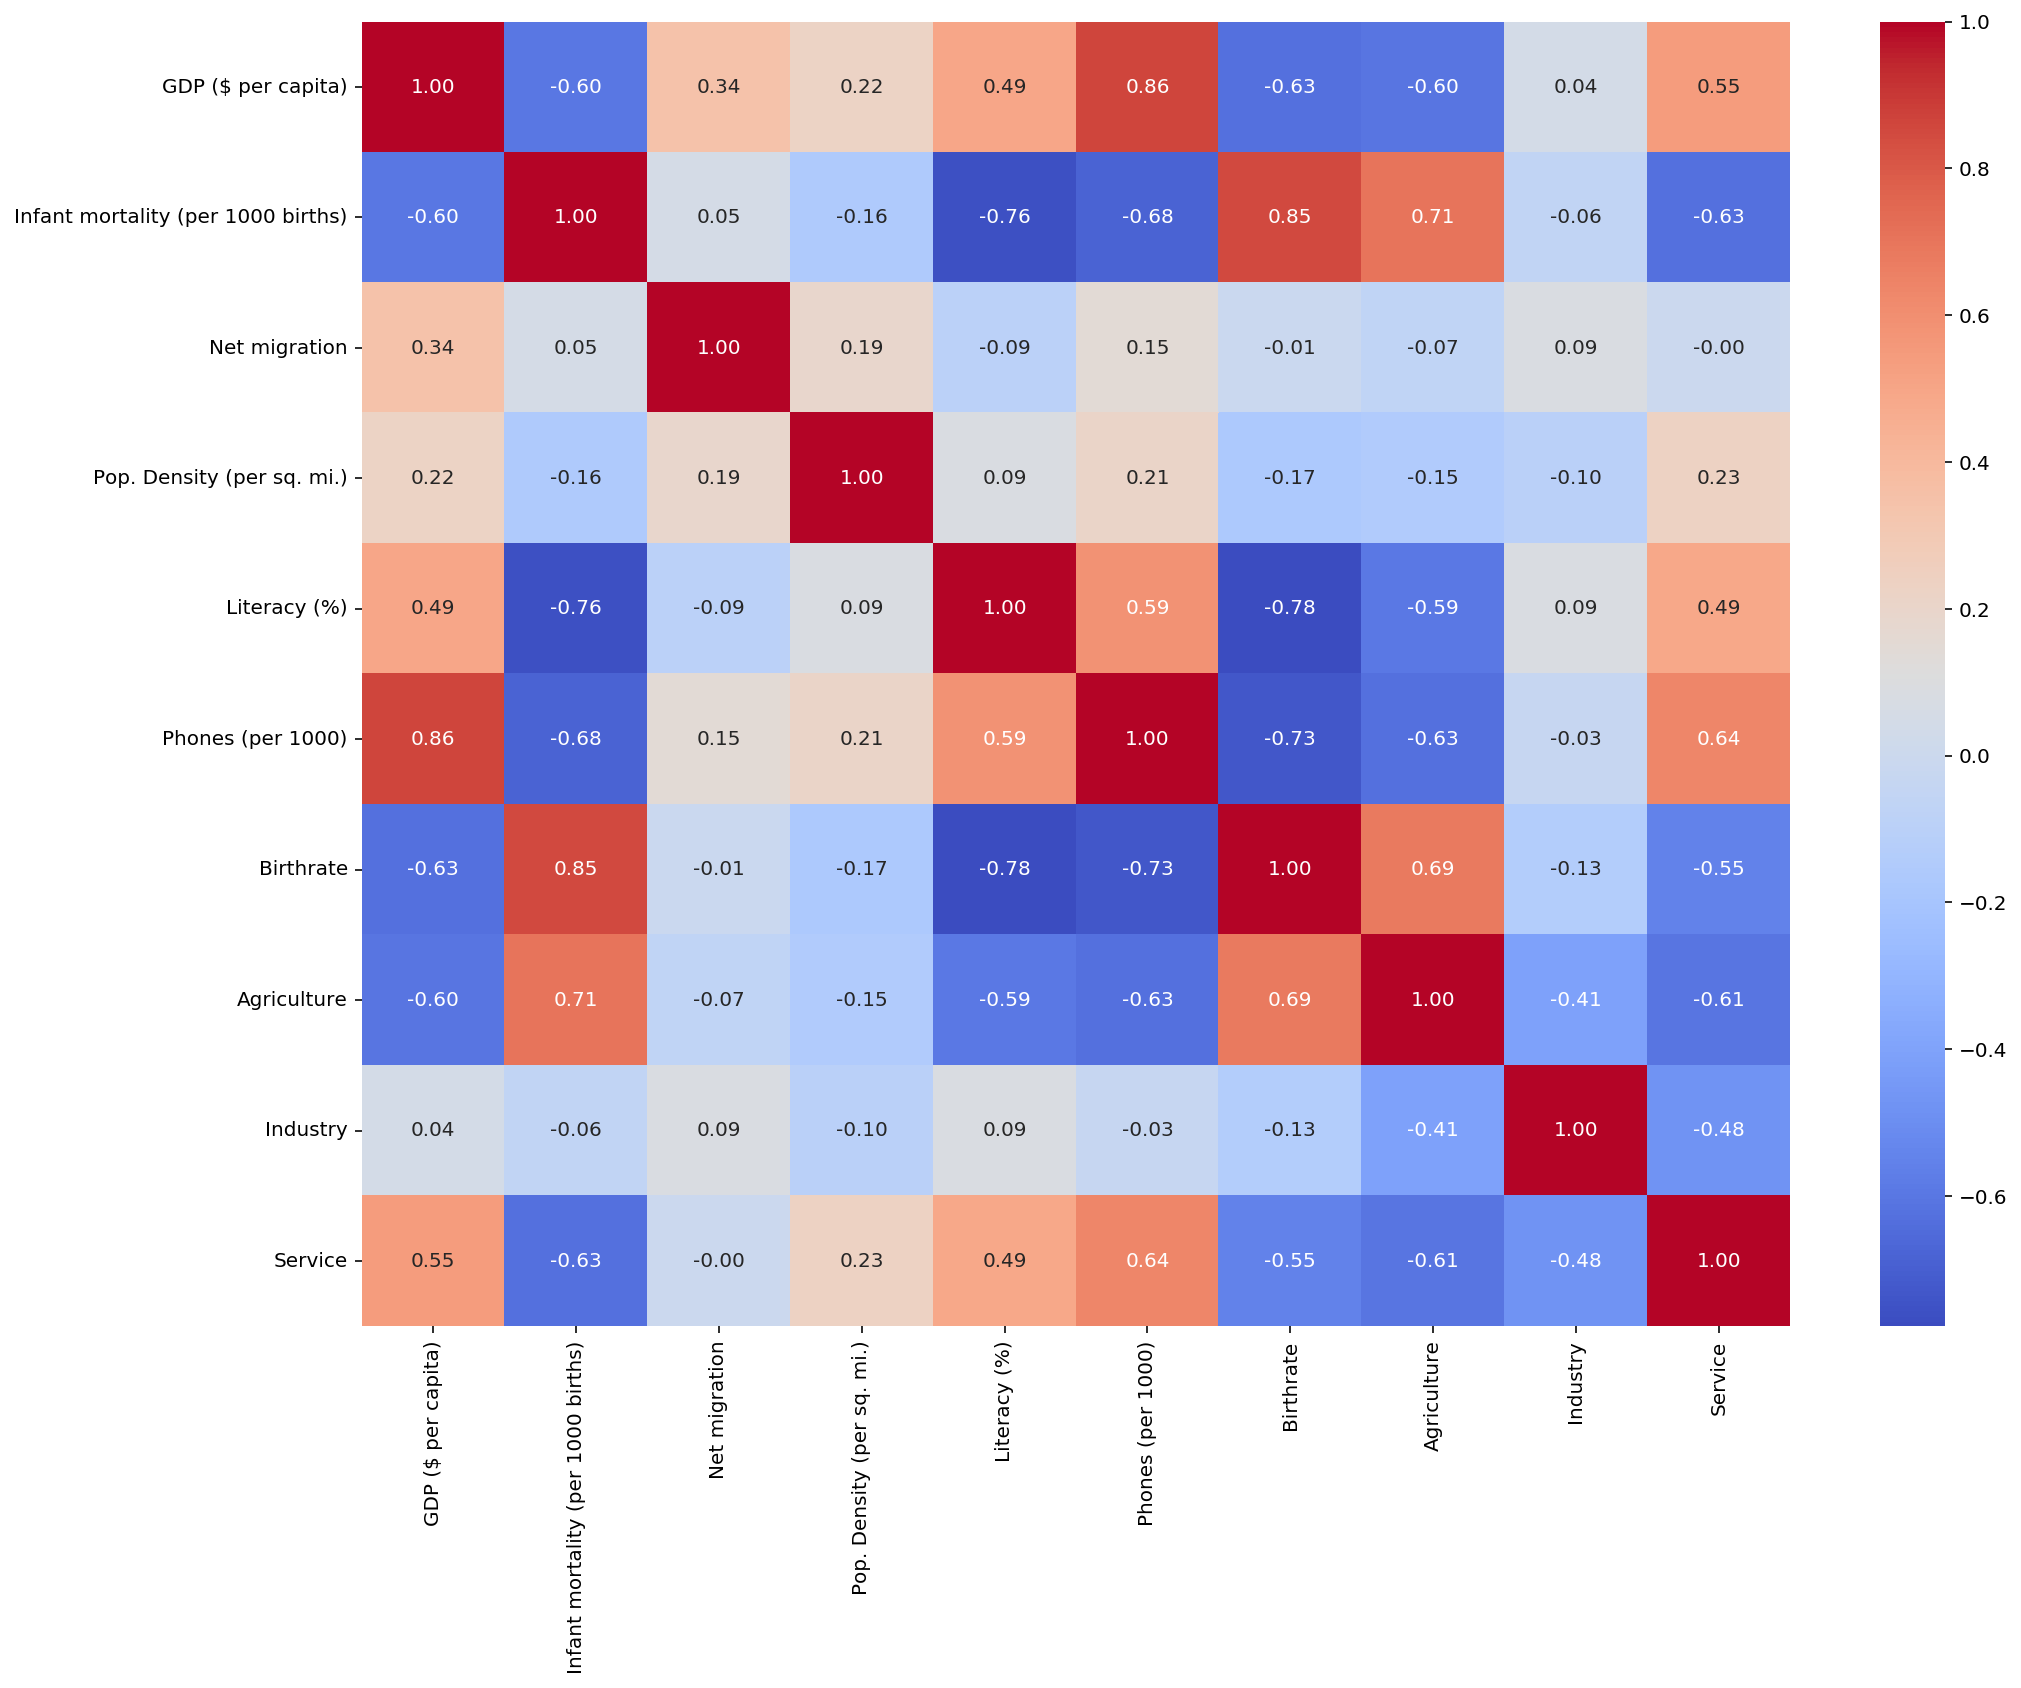

In [40]:
plt.figure(figsize=(16,12))
sns.heatmap(data=gdp_data.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

Now lets go ahead and plot out each of the GPD values compared to each of the columns we slected above to get a better idea of what the data looks like. We will keep the GDP on the Y-axis and the value we are comparing it to on the X-axis

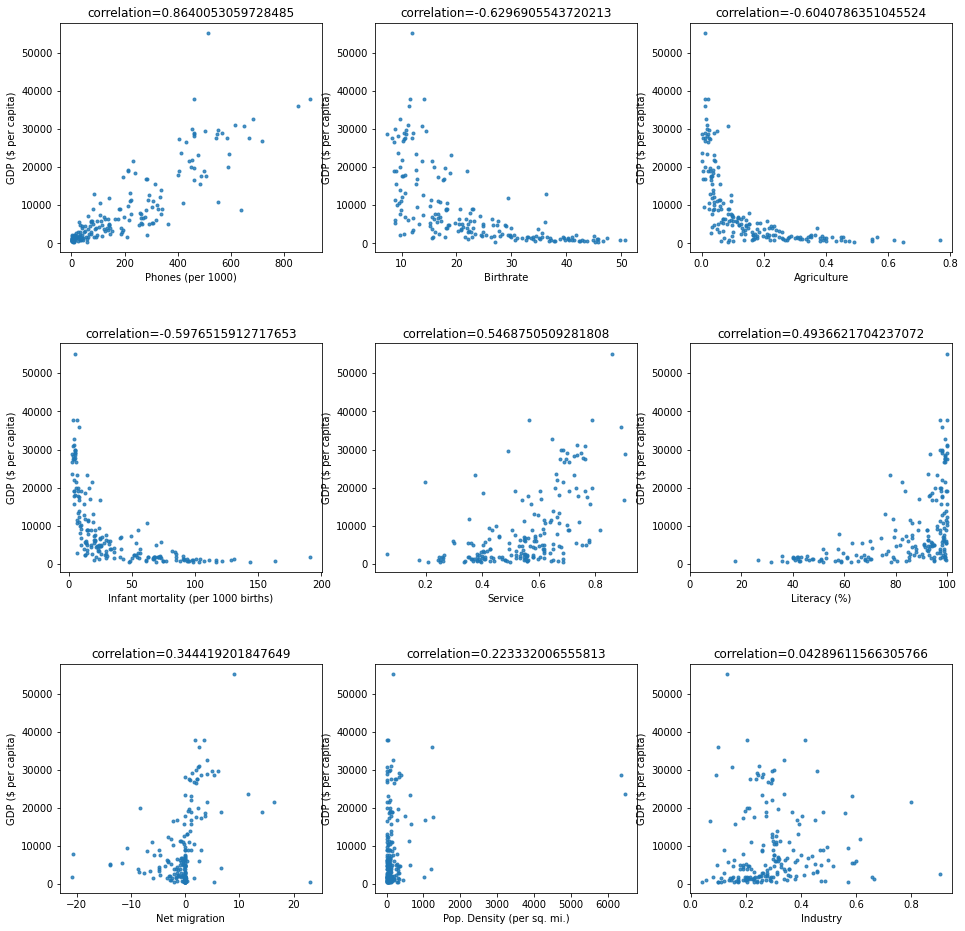

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,16))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series(dtype='float64')
for col in gdp_data.columns.values:
  if not col == 'GDP ($ per capita)':
    corr_to_gdp[col] = gdp_data['GDP ($ per capita)'].corr(gdp_data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]


for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=gdp_data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

Once again, we will be combining everything into functions that we can take with us to later sections and later notebooks

In [41]:
def get_gdp_dataset(merged_data):
  merged_data = merged_data.drop(['Male Height in Cm', 'Female Height in Cm'], axis=1)
  merged_data['Average Height in Ft'] = merged_data['Female Height in Ft'] / 2 + merged_data['Male Height in Ft'] / 2
  merged_data = merged_data.drop(['Male Height in Ft', 'Female Height in Ft'], axis=1)

  GDP_features = ['GDP ($ per capita)', 'Infant mortality (per 1000 births)', 'Net migration', 'Pop. Density (per sq. mi.)',
                'Literacy (%)', 'Phones (per 1000)', 'Birthrate', 'Agriculture', 'Industry', 'Service']
  gdp_data = merged_data[GDP_features]
  
  return gdp_data

# **Section 4**: All of the functions and imports we need

> Here are all of the modules and functions we used throughout this notebook

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [44]:
# FUNCTIONS FROM SECTION 1
def merge_data(country_data, height_data):
  height_data = height_data.rename(columns={"Country Name" : "Country"})
  country_data['Country'] = country_data.apply(lambda row : row.astype(str)['Country'][:-1], axis=1)
  old_names = ['Antigua & Barbuda', 'Bahamas, The', 'Bosnia & Herzegovina', 'Central African Rep.', 'Congo, Dem. Rep.', 'Swaziland', 'Gambia, The', 'Cote d\'Ivoire',
             'Micronesia, Fed. St.', 'Burma', 'Korea, North', 'Macedonia', 'Congo, Repub. of the', 'Saint Kitts & Nevis', 'Sao Tome & Principe',
             'Korea, South', 'East Timor', 'Trinidad & Tobago']

  new_names = ['Antigua and Barbuda', 'Bahamas', 'Bosnia and Herzegovina', 'Central African Republic', 'DR Congo', 'Eswatini', 'Gambia', 'Ivory Coast', 'Micronesia',
              'Myanmar', 'North Korea', 'North Macedonia', 'Republic of the Congo', 'Saint Kitts and Nevis', 'Sao Tome and Principe', 'South Korea',
              'Timor-Leste', 'Trinidad and Tobago']

  for i in range(len(old_names)):
    country_data['Country'].replace({old_names[i]: new_names[i]}, inplace=True)
  
  merged_df = pd.merge(country_data, height_data, on=['Country'])
  return merged_df



# FUNCTIONS FROM SECTION 2
def rename_regions(row):
  if row['Region'] == 'ASIA (EX. NEAR EAST)':
    region = 'ASIA'
  elif row['Region'] == 'NEAR EAST':
    region = 'MIDDLE EAST'
  elif row['Region'] == 'C.W. OF IND. STATES':
    region = "C.W.I. STATES"
  else:
    region = row['Region']
  return region

def format_and_clean_data(merged_data):

  merged_data['Region'] = merged_data.apply(lambda row : row.astype(str)['Region'].strip(), axis=1)
  merged_data['Region'] = merged_data.apply(lambda row : rename_regions(row), axis=1)

  for col in merged_data.columns.values:
    # if there aren't any null values in this col, skip it
    if merged_data[col].isnull().sum() == 0:
        continue
    # if the col is climate, get the mode, or most common value, and use it as the guessed values
    if col == 'Climate':
        guess_values = merged_data.groupby('Region')['Climate'].apply(lambda x: x.mode())
    else:
    # in all other cases, get the median, or average, of the column grouped by the region
        guess_values = merged_data.groupby('Region')[col].median()
    # for each region in the data set, go through and find all of the null values and set them to the median for that region
    for region in merged_data['Region'].unique():
        merged_data[col].loc[(merged_data[col].isnull())&(merged_data['Region']==region)] = guess_values[region]

  return merged_data



# FUNCTIONS FROM SECTION 3
def get_gdp_dataset(merged_data):
  merged_data = merged_data.drop(['Male Height in Cm', 'Female Height in Cm'], axis=1)
  merged_data['Average Height in Ft'] = merged_data['Female Height in Ft'] / 2 + merged_data['Male Height in Ft'] / 2
  merged_data = merged_data.drop(['Male Height in Ft', 'Female Height in Ft'], axis=1)

  GDP_features = ['GDP ($ per capita)', 'Infant mortality (per 1000 births)', 'Net migration', 'Pop. Density (per sq. mi.)',
                'Literacy (%)', 'Phones (per 1000)', 'Birthrate', 'Agriculture', 'Industry', 'Service']
  gdp_data = merged_data[GDP_features]
  
  return gdp_data